# Example notebook - How to run a climate simulation for aviation

In [7]:
# --- Import libraries ---
import numpy as np
from aerometrics.climate_models.aviation_climate_simulation import AviationClimateSimulation
from aerometrics.utils.functions import plot_simulation_results, show_model_info

In [8]:
# --- Set parameters ---
start_year = 2020  # start year of simulation
end_year = 2050  # end year of simulation

# Time evolution of emissions for each species
species_inventory = {
     "CO2": np.random.rand(end_year - start_year + 1) * 1e9,  # in kg
     "NOx - ST O3 increase": np.random.rand(end_year - start_year + 1) * 1e6,  # in kg
     "NOx - CH4 decrease and induced": np.random.rand(end_year - start_year + 1) * 1e6,  # in kg
     "Contrails": np.random.rand(end_year - start_year + 1) * 1e-3,  # in W/m^2
     "H2O": np.random.rand(end_year - start_year + 1) * 1e6,  # in kg
     "Soot": np.random.rand(end_year - start_year + 1) * 1e6,  # in kg
     "Sulfur": np.random.rand(end_year - start_year + 1) * 1e6,  # in kg
}

In [9]:
# You can now select a model and show its properties
climate_model = "LWE"  # "GWP*", "LWE", "FaIR"  # climate model to employ for simulation
show_model_info(climate_model)


Class: LWEClimateModel
Attributes (with values):
  • available_species: ['CO2', 'Contrails', 'NOx - ST O3 increase', 'NOx - CH4 decrease and induced', 'Soot', 'Sulfur', 'H2O']
  • available_species_settings: {'CO2': {'ratio_erf_rf': <class 'float'>}, 'Contrails': {'sensitivity_rf': <class 'float'>, 'ratio_erf_rf': <class 'float'>, 'efficacy_erf': <class 'float'>}, 'NOx - ST O3 increase': {'sensitivity_rf': <class 'float'>, 'ratio_erf_rf': <class 'float'>, 'efficacy_erf': <class 'float'>}, 'NOx - CH4 decrease and induced': {'ch4_loss_per_nox': <class 'float'>, 'ratio_erf_rf': <class 'float'>, 'efficacy_erf': <class 'float'>}, 'Soot': {'sensitivity_rf': <class 'float'>, 'ratio_erf_rf': <class 'float'>, 'efficacy_erf': <class 'float'>}, 'Sulfur': {'sensitivity_rf': <class 'float'>, 'ratio_erf_rf': <class 'float'>, 'efficacy_erf': <class 'float'>}, 'H2O': {'sensitivity_rf': <class 'float'>, 'ratio_erf_rf': <class 'float'>, 'efficacy_erf': <class 'float'>}}
  • available_model_settings: {'

In [10]:
# Set climate parameters relative to each species, according to the available parameters of the selected climate model
species_settings = {
    "CO2": {"sensitivity_rf": 1.0, "ratio_erf_rf": 1.0, "efficacy_erf": 1.0},
    "NOx - ST O3 increase": {"sensitivity_rf": 7.6e-12, "ratio_erf_rf": 1.37, "efficacy_erf": 1.0},
    "NOx - CH4 decrease and induced": {"sensitivity_rf": -6.1e-12, "ch4_loss_per_nox": -6.1e-12, "ratio_erf_rf": 1.18, "efficacy_erf": 1.0},
    "Contrails": {"sensitivity_rf": 2.23e-12, "ratio_erf_rf": 0.42, "efficacy_erf": 1.0},
    "H2O": {"sensitivity_rf": 5.2e-15, "ratio_erf_rf": 1.0, "efficacy_erf": 1.0},
    "Soot": {"sensitivity_rf": 1.0e-10, "ratio_erf_rf": 1.0, "efficacy_erf": 1.0},
    "Sulfur": {"sensitivity_rf": -2.0e-11, "ratio_erf_rf": 1.0, "efficacy_erf": 1.0},
}

# Climate model settings
model_settings = {"tcre": 0.00045} 

In [11]:
# --- Run simulation ---
results = AviationClimateSimulation(
    climate_model,
    start_year,
    end_year,
    species_inventory,
    species_settings,
    model_settings
).run(return_xr=True)
results

<xarray.Dataset> Size: 12kB
Dimensions:                      (species: 14, year: 31)
Coordinates:
  * species                      (species) <U30 2kB 'CO2' ... 'Total'
  * year                         (year) int64 248B 2020 2021 2022 ... 2049 2050
Data variables:
    effective_radiative_forcing  (species, year) float64 3kB 4.066e-07 ... 8....
    radiative_forcing            (species, year) float64 3kB 4.066e-07 ... 8....
    temperature                  (species, year) float64 3kB 1.073e-07 ... 3....

<Axes: title={'center': 'Temperature'}, xlabel='Year', ylabel='Temperature'>

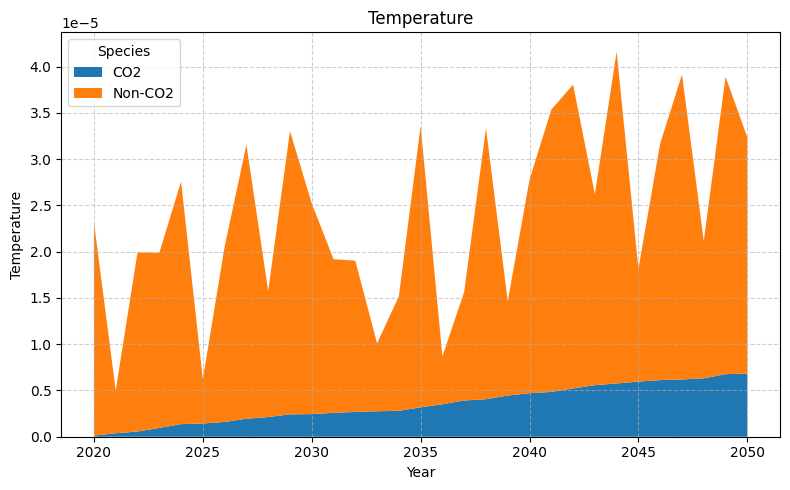

In [4]:
# --- Plot results ---
plot_simulation_results(results, data_var="temperature", species=["CO2", "Non-CO2"], stacked=True)

In [5]:
from aerometrics.climate_models.fair_climate_model import FairClimateModel




Class: FairClimateModel
Attributes (with values):
  • available_species: ['CO2', 'Contrails', 'NOx - ST O3 increase', 'NOx - CH4 decrease and induced', 'Soot', 'Sulfur', 'H2O']
  • available_species_settings: {'CO2': {'ratio_erf_rf': <class 'float'>}, 'Contrails': {'sensitivity_rf': <class 'float'>, 'ratio_erf_rf': <class 'float'>, 'efficacy_erf': <class 'float'>}, 'NOx - ST O3 increase': {'sensitivity_rf': <class 'float'>, 'ratio_erf_rf': <class 'float'>, 'efficacy_erf': <class 'float'>}, 'NOx - CH4 decrease and induced': {'ch4_loss_per_nox': <class 'float'>, 'ratio_erf_rf': <class 'float'>, 'efficacy_erf': <class 'float'>}, 'Soot': {'ratio_erf_rf': <class 'float'>, 'efficacy_erf': <class 'float'>}, 'Sulfur': {'ratio_erf_rf': <class 'float'>, 'efficacy_erf': <class 'float'>}, 'H2O': {'sensitivity_rf': <class 'float'>, 'ratio_erf_rf': <class 'float'>, 'efficacy_erf': <class 'float'>}}
  • available_model_settings: {'rcp': str | None, 'background_species_quantities': <class 'dict'>, 'b